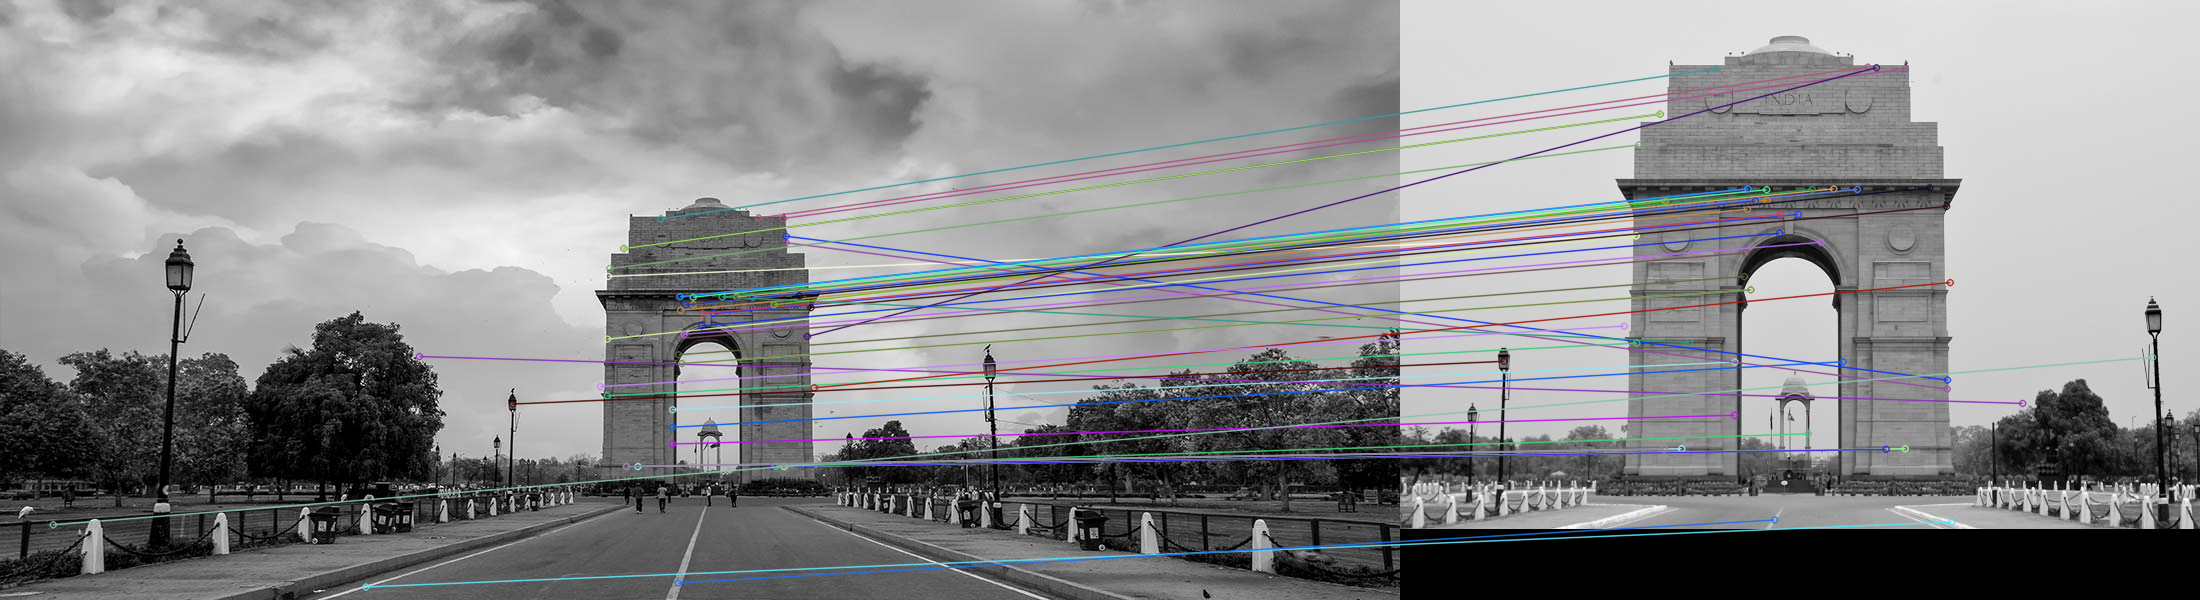

In [4]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load images in grayscale
img1 = cv2.imread('/content/India-Gate_1400.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('/content/078212929Delhi_India_Gate_Main.jpg', cv2.IMREAD_GRAYSCALE)

# Initialize SIFT detector
sift = cv2.SIFT_create()

# Detect keypoints and compute descriptors
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# Use BFMatcher to match features
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
matches = bf.match(des1, des2)

# Sort matches by distance (best matches first)
matches = sorted(matches, key=lambda x: x.distance)

# Draw top 50 matches
sift_matches = cv2.drawMatches(img1, kp1, img2, kp2, matches[:50], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Display results
cv2_imshow(sift_matches)


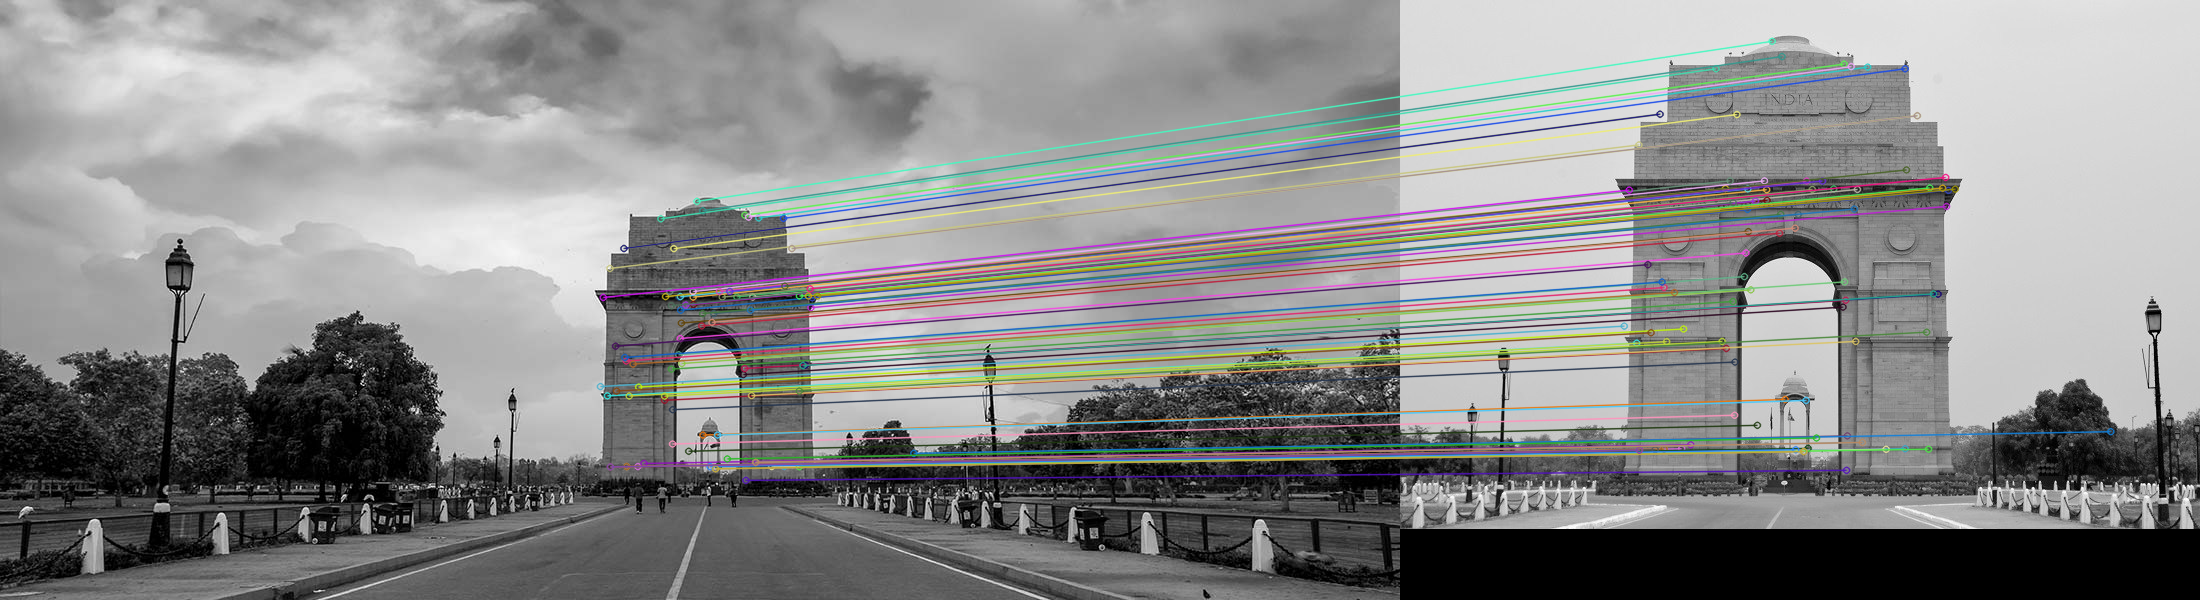

In [5]:
# Extract point coordinates from matches
src_pts = np.float32([kp1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
dst_pts = np.float32([kp2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)

# Apply RANSAC to find a transformation and remove bad matches
M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
matchesMask = mask.ravel().tolist()

# Draw only inlier matches
ransac_matches = cv2.drawMatches(img1, kp1, img2, kp2, matches, None, matchesMask=matchesMask, flags=2)

# Display results
cv2_imshow(ransac_matches)
